<a href="https://colab.research.google.com/github/benji555-create/Data-Science/blob/main/BGUnit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Over/Underfitting, Model Visualization, and Model/Variable Selection Concepts

Unlike previous exercises, I won't ask you to code or do mathematical computations.

Instead, these exercises are meant to get you to think about the model and variable selection process.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

In [2]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr


!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-tz6y_4dp
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-tz6y_4dp
  Resolved https://github.com/pydata/xarray.git to commit 6bea71572120c0eef2e4bf8d269d32b17a39dc35
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached bambi-0.15.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached formulae-0.5.4-py3-none-any.whl.metadata (4.5 kB)
Using cached bambi-0.15.0-py3-none-any.whl (109 kB)
Using cached formulae-0.5.4-py3-none-any.whl (53 kB)
  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-i021t72y
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-i021t72y
  Resolved https://github.com/pydata/xarray.git to commit 6bea71572120c0eef2e4bf8d269d32b17a39dc35
  Installing build dependencies ... do

**Task1**:

Does elpd_loo mean anything if we only have one model?

elpd_loo is used to compare different models, so when you use it on one model, instead of comparing the predictive performance of multiple models, it just shows the performance of one, giving an elpd_loo value of 0.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when the model learns the data and its outliers, causing new predictive data to become too complex. It fits the prior data extremely well, but then is very incosistent and has high variance on new data.

**Task3**:

How do we mitigate overfitting?

You can mitigate overfitting by doing many things. First off, it is easy to just simplify either the model or the data, preventing outliers or using a simpler model with less variables. Changing priors are also basically the way to prevent overfitting.

**Task4**:

How do we mitigate underfitting?

Because underfitting is the opposite of overfitting, you can instead use more complex models rather than simple linear models. You can also change the priors to use mroe variables, making it more complicated so the model fits the data better.

**Task5**:

Why would we want more than one predictor in a model?

Using more than one predictor can cause more complex models to be usable, creating more accurate, helpful, and complex data sets. Using more than one predicotr will also increase the power of predictors. You have to use the right amount of predictors, and a trial and error approach to find that can be tedious.

**Task6**:

Can we have too many predictors? How would we now?

Too many predictors can cause problems, and overfitting is at the forefront. If your model is overfit, then you likely have too many predictors. Another problem is that more predictors can cause a need for higher model complexity.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of selecting predictors and which ones fit data best. Using elpd_loo, comparing to other models, you can find the best predictors. It's a tedious process, with you have to continually adjust until you find a solid fit.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The standard method of adding the variables in the model creates a simpler code, and is useful when it seems like the model is continous with no change in its variables. One problem is that it ignores any interaction between continous and catergorical predictors. When you use the categorical variable as a hierarchy on the other predictor variable, you consider that the continous predictor might change depending on the categorical variable, the opposite of a standard model. Its very useful when you think the predictor might change based on the categorical variable, providing a solution to variance not found in a standard model. One problem is that it doesn't do a perfect job representing variance, and it has similar problems to standard model, but it just also shows the predictor can be varied. The third and most complex model is one that adds the variables and the categorical variables interaction with the other variable. This solves the problem of the other two models, with a now added potential for allowing the variable and categorical variable to interact in case of variance. This model is very strong as it works for very complex models, but because of this, it can be very hard to read. There can also be lots of oppurtunities for error, such as overfitting.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

You can't visualize the entire model all at once, but you can visualize different aspects of the model to help show you how the model would fit the data. Using scatterplots or bar graphs will let you visualize the models seperately.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

predictors free throw percentage and position (with position as a categorical predictor)

predictors free throw percentage and position (with position as a hierarchy)

predictors free throw percentage and position (with position interacting with frew throw percentage)

predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors

predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using az.compare() and az.plot_compare(), or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [4]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [5]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [14]:
model_1 = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [7]:
model_2 = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


In [8]:
model_3 = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [9]:
model_4 = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [10]:
model_5 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

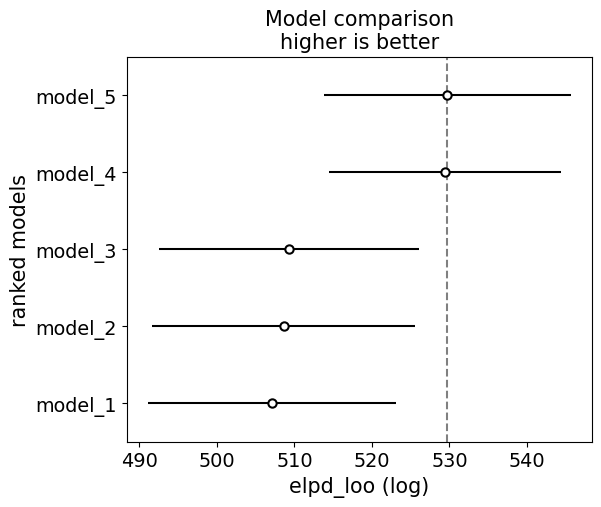

In [15]:
compare = az.compare({"model_1":model_1, "model_2":model_2, "model_3":model_3, "model_4":model_4, "model_5":model_5})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The most accurate models are 4 and 5. This is likely because by intergrating three pointers into the model, your creating a model more reliant on shooters. In basketball it's common knowledge that if you're a better three point shooter, you're a better free throw shooter. Model 5, using an interaction between position and three pointers, is slightly more accurate, and is what i would say the strongest model. Position in basketball completely changes the way you play, with positions like centers shooting very little three pointers compared to positions like point guards.

